# DATA ANALYSIS

In [31]:
!pip install -r requirements.txt
!pip install textblob

  Using cached click-8.1.8-py3-none-any.whl.metadata (2.3 kB)
  Using cached regex-2024.11.6-cp39-cp39-win_amd64.whl.metadata (41 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 624.3/624.3 kB 7.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   -------------------- ------------------- 0.8/1.5 MB 1.9 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 3.6 MB/s eta 0:00:00
Using cached regex-2024.11.6-cp39-cp39-win_amd64.whl (274 kB)
Using cached click-8.1.8-py3-none-any.whl (98 kB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)

   ---------------------------------------- 0/5 [tqdm]
   -------- ------------------------------- 1/5 [regex]
   ---------------- ----------------------- 2/5 [click]
   ------------------------ ------

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.manifold import TSNE
from wordcloud import WordCloud

In [3]:
train_df = pd.read_csv('Data/train.txt', sep=';', names=['text', 'label'])
val_df = pd.read_csv('Data/val.txt', sep=';', names=['text', 'label'])
test_df = pd.read_csv('Data/test.txt', sep=';', names=['text', 'label'])


# Class Distribution

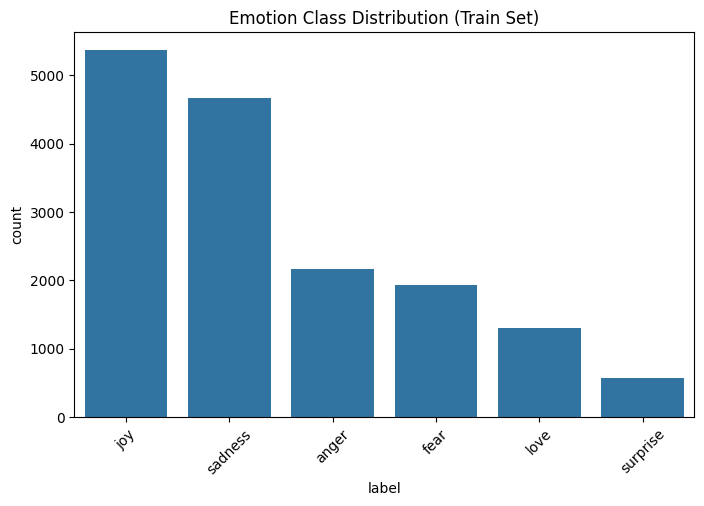

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='label', data=train_df, order=train_df['label'].value_counts().index)
plt.title("Emotion Class Distribution (Train Set)")
plt.xticks(rotation=45)
plt.show()


# Checking null and removing Duplicates in train

In [16]:
print(train_df.isnull().sum())
print(train_df.duplicated().sum())

# removing Duplicates
index = train_df[train_df.duplicated()==True].index
train_df.drop(index , axis =0 ,inplace=True)
train_df.reset_index(inplace=True, drop=True)

print(train_df.duplicated().sum())


text        0
label       0
text_len    0
dtype: int64
1
0


# Checking null and removing Duplicates in test


In [20]:
print(test_df.isnull().sum())
print(test_df.duplicated().sum())



text        0
label       0
text_len    0
dtype: int64
0


# Checking null and removing Duplicates in val


In [21]:
print(val_df.isnull().sum())
print(val_df.duplicated().sum())



text        0
label       0
text_len    0
dtype: int64
0


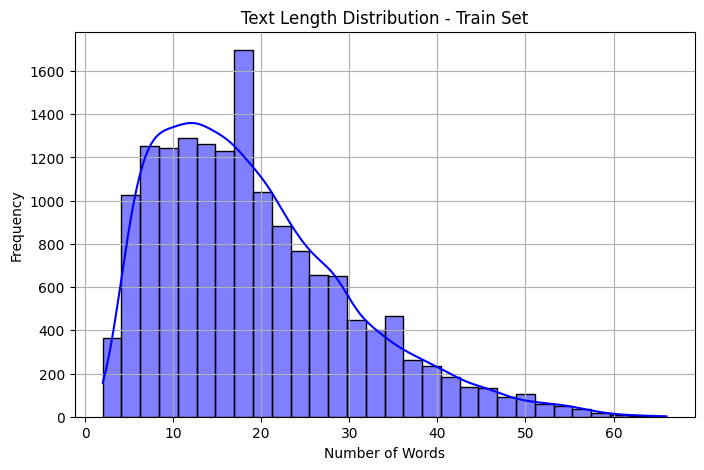

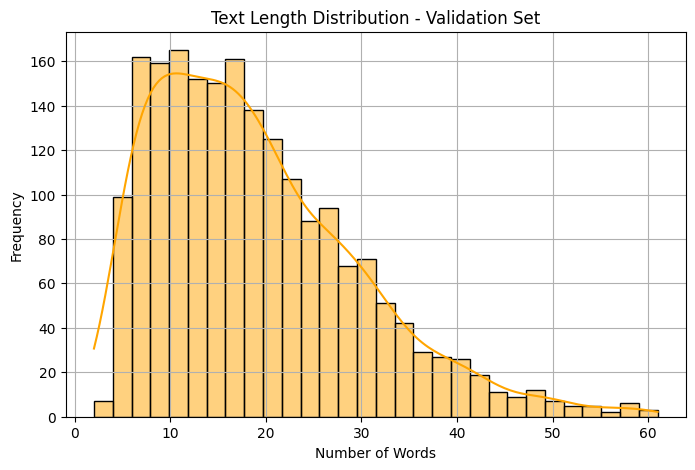

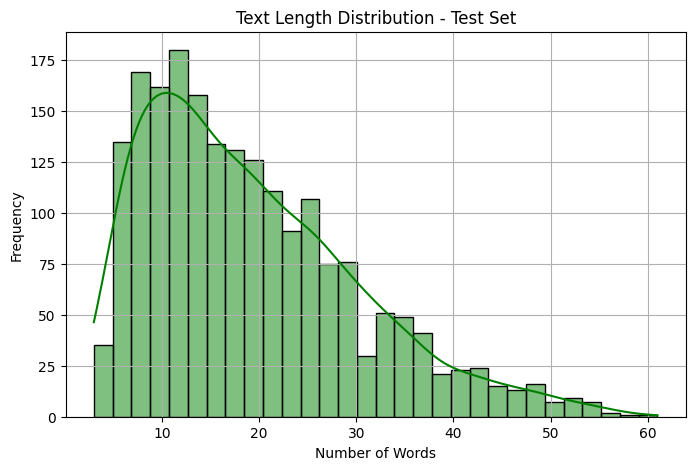

In [ ]:
#text lengths
train_df['text_len'] = train_df['text'].apply(lambda x: len(x.split()))
val_df['text_len'] = val_df['text'].apply(lambda x: len(x.split()))
test_df['text_len'] = test_df['text'].apply(lambda x: len(x.split()))

#Train Set
plt.figure(figsize=(8, 5))
sns.histplot(train_df['text_len'], bins=30, kde=True, color='blue')
plt.title("Text Length Distribution - Train Set")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

#Validation Set
plt.figure(figsize=(8, 5))
sns.histplot(val_df['text_len'], bins=30, kde=True, color='orange')
plt.title("Text Length Distribution - Validation Set")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()
# Test Set
plt.figure(figsize=(8, 5))
sns.histplot(test_df['text_len'], bins=30, kde=True, color='green')
plt.title("Text Length Distribution - Test Set")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


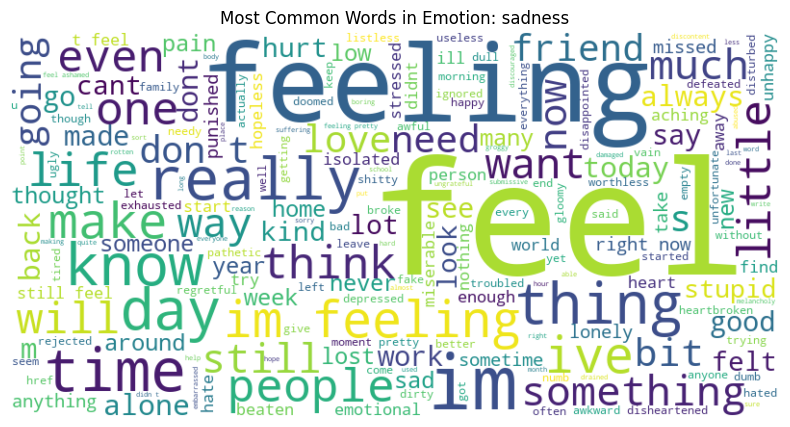

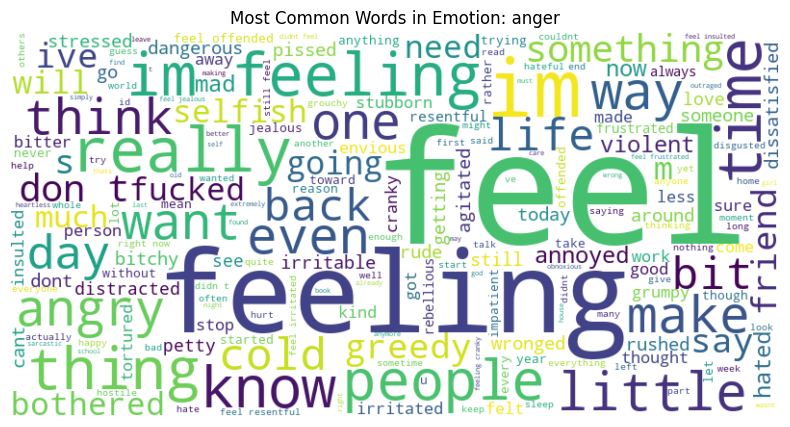

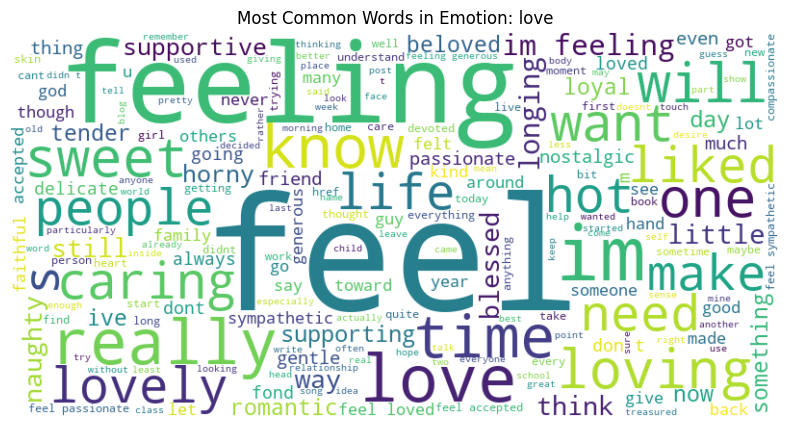

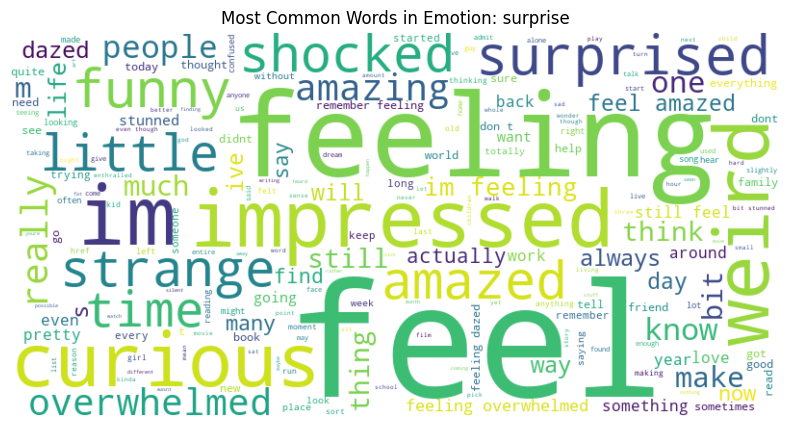

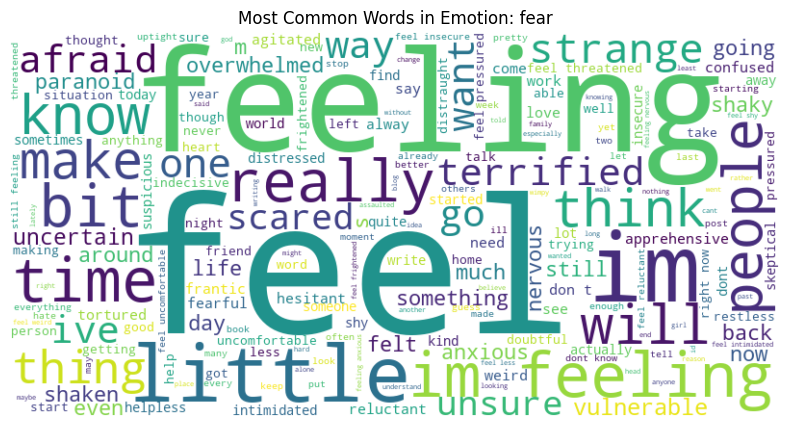

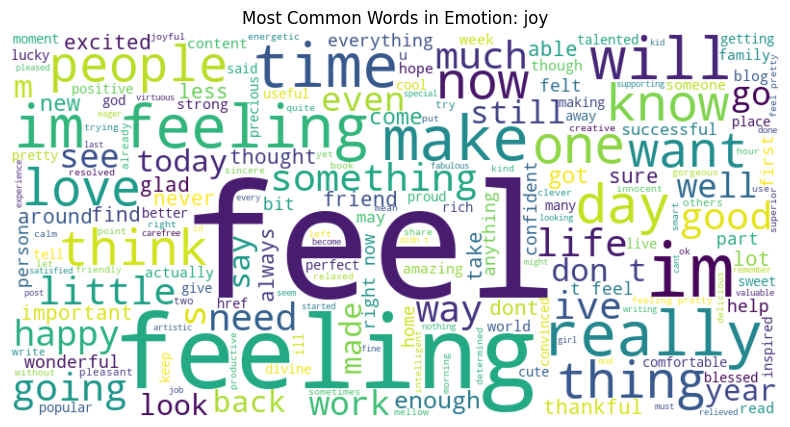

In [22]:
for emotion in train_df['label'].unique():
    text = ' '.join(train_df[train_df['label'] == emotion]['text'].tolist())
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Most Common Words in Emotion: {emotion}")
    plt.show()

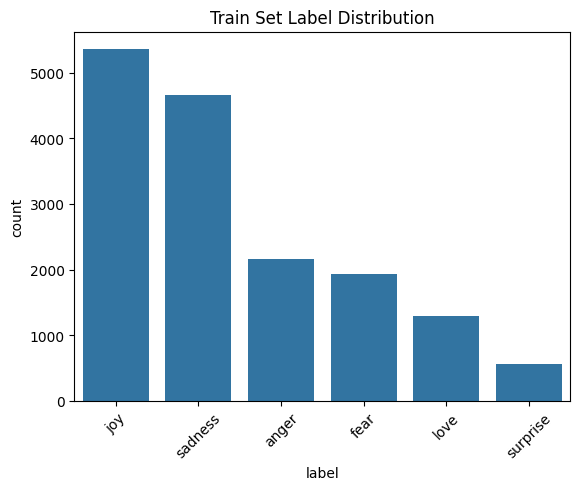

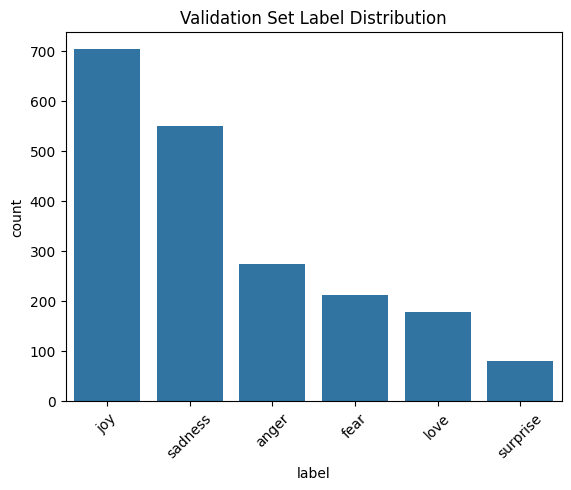

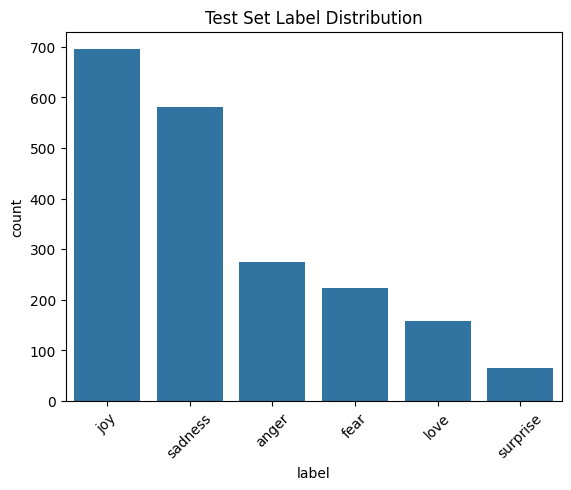

In [23]:
def plot_label_dist(df, title):
    sns.countplot(x='label', data=df, order=df['label'].value_counts().index)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

plot_label_dist(train_df, "Train Set Label Distribution")
plot_label_dist(val_df, "Validation Set Label Distribution")
plot_label_dist(test_df, "Test Set Label Distribution")


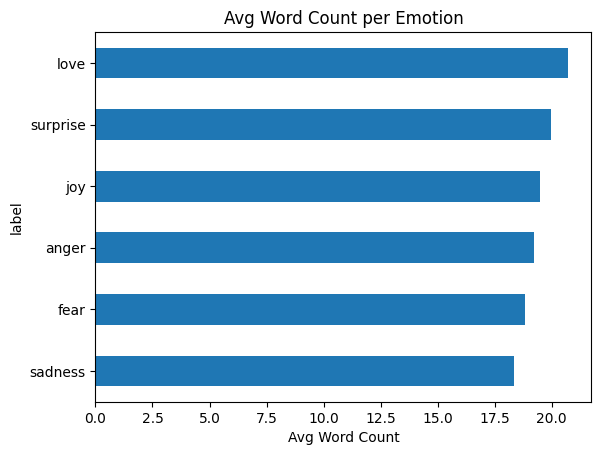

In [26]:
# Words
train_df.groupby('label')['text_len'].mean().sort_values().plot(kind='barh', title="Avg Word Count per Emotion")
plt.xlabel("Avg Word Count")
plt.show()




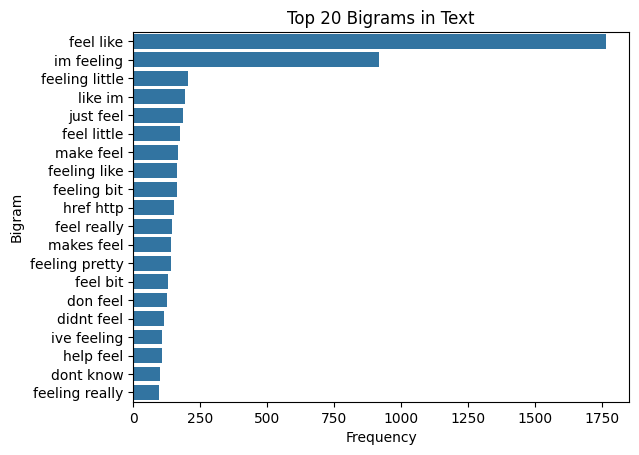

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')
X = vectorizer.fit_transform(train_df['text'])
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

# Plot top 20 bigrams
top_20_bigrams = words_freq[:20]
bigrams_df = pd.DataFrame(top_20_bigrams, columns=['Bigram', 'Frequency'])
sns.barplot(y='Bigram', x='Frequency', data=bigrams_df)
plt.title("Top 20 Bigrams in Text")
plt.show()



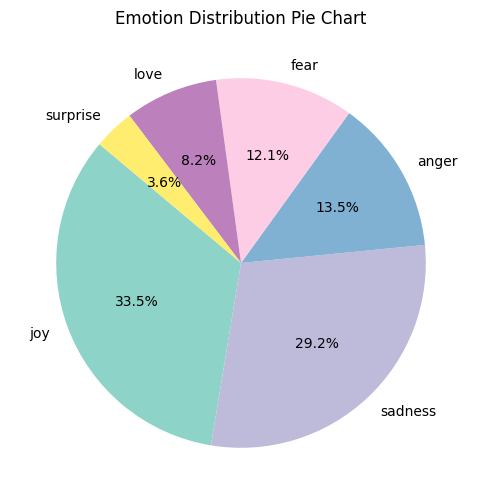

In [30]:
plt.figure(figsize=(6, 6))
train_df['label'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, cmap='Set3')
plt.title("Emotion Distribution Pie Chart")
plt.ylabel('')
plt.show()


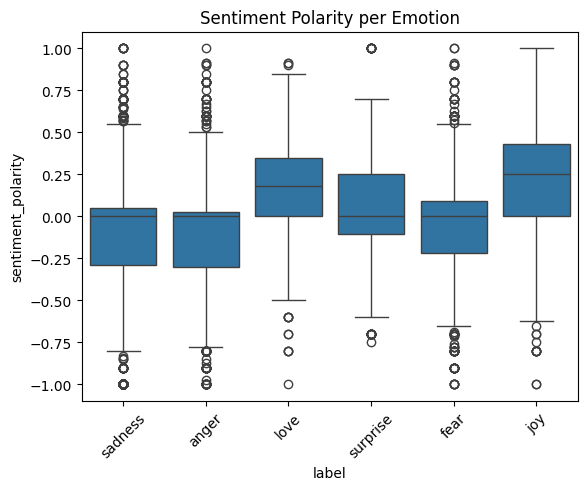

In [32]:
from textblob import TextBlob

train_df['sentiment_polarity'] = train_df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

sns.boxplot(data=train_df, x='label', y='sentiment_polarity')
plt.xticks(rotation=45)
plt.title("Sentiment Polarity per Emotion")
plt.show()
